# Laboratorio 3 Modelación y Simulación
## Parte 2 

- Marco Jurado 20308
- Cristian Aguirre 20231
- Diego Cordova 20212

### Task 1
Considere un experimento en el cual se cuentan cuántos carros pasan por una calle determinada dentro de un
rango de tiempo dado. Sabemos que el tiempo de espera para el n-ésimo evento puede ser modelando a través de
una variable gamma. Considere el caso en el que usted está esperando que pase el 3er carro en la calle dada.
1. Para diferentes lambdas en [2, 1, 0.5], grafique las distribuciones gamma para cada uno de los casos.

In [33]:
# imports 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
import random

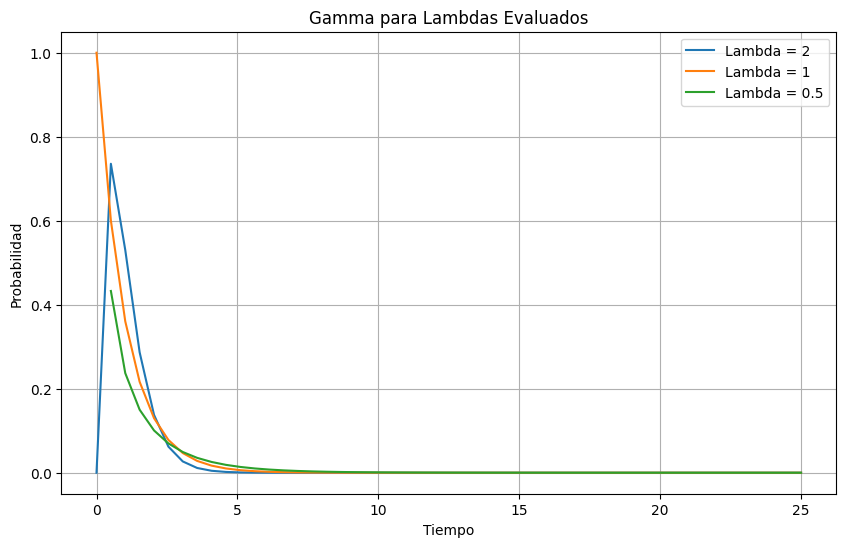

In [34]:
valores_lambda = [2,1,0.5]
rangos_eval = np.linspace(0, 25, 50)

# hacer grafico 
plt.figure(figsize=(10, 6))
for l in valores_lambda:
    y = gamma.pdf(rangos_eval, l, scale=1/l) # valores de gamma con los lambda
    plt.plot(rangos_eval, y, label=f"Lambda = {l}")

plt.xlabel("Tiempo")
plt.ylabel("Probabilidad")
plt.title("Gamma para Lambdas Evaluados")
plt.legend()
plt.grid(True)
plt.show()

¿Qué conclusiones puede obtener de las gráficas obtenidas en términos de los tiempos de espera y el
número de ocurrencias del evento? ¿Qué relación existe entre el tiempo de espera y el número de
ocurrencias de un evento?<br><br>
- El tiempo de espera representado en el eje x denota como una probabilidad de que esperar x cantidad de tiempo va a ir cambiando en el tiempo. Podemos ver que los valores lambda hacen que el tiempo de espera para una probabilidad de ver el tercer carro.
- Al usar un lambda mayor la probabilidad de ocurrencias del tecer carro es mayor. Por ende tenemos una relacion que data que el valor del lambda esta directamente asociado con la probabilidad de ocurrencias de ver el tecer carro (evento evaluado para este ejercicio)

### Task 2
Construya un programa que compare estos tres generadores a través de un histograma de asteriscos (de 0
a 1 con saltos de 0.1) Use tres comparaciones para 100, 5,000 y 100,000 repeticiones.

In [35]:
def gen1(n):
    retorno = []
    for j in range(n):
        if j == 0:
            retorno.append(((5**5) * 1) % (2**35 - 1))
        else:
            retorno.append(((5**5) * retorno[j - 1]) % (2**35 - 1))
    
    # hay que normalizar los valores para tener valores entre 0 y 1.
    retorno = [x / (2**35 - 1) for x in retorno]
    
    return retorno[-1]



In [36]:
def gen2(n):
    retorno = []
    for j in range(n):
        if j == 0:
            retorno.append(((7**5) * 1) % (2**31 - 1))
        else:
            retorno.append(((7**5) * retorno[j - 1]) % (2**31 - 1))
    
    # hay que normalizar los valores para tener valores entre 0 y 1.
    retorno = [x / (2**31 - 1) for x in retorno]
    
    
    return retorno[-1]

In [37]:
import random
import math

def gen3(n):
    return random.random()

In [38]:
def evaluar_pseudo_randoms(reps):
    resultados1 = []
    resultados2 = []
    resultados3 = []
    for i in range(1,reps+1):
        resultados1.append(gen1(i))
        resultados2.append(gen2(i))
        resultados3.append(gen3(i))
    
    graficar_results(resultados1, resultados2, resultados3)


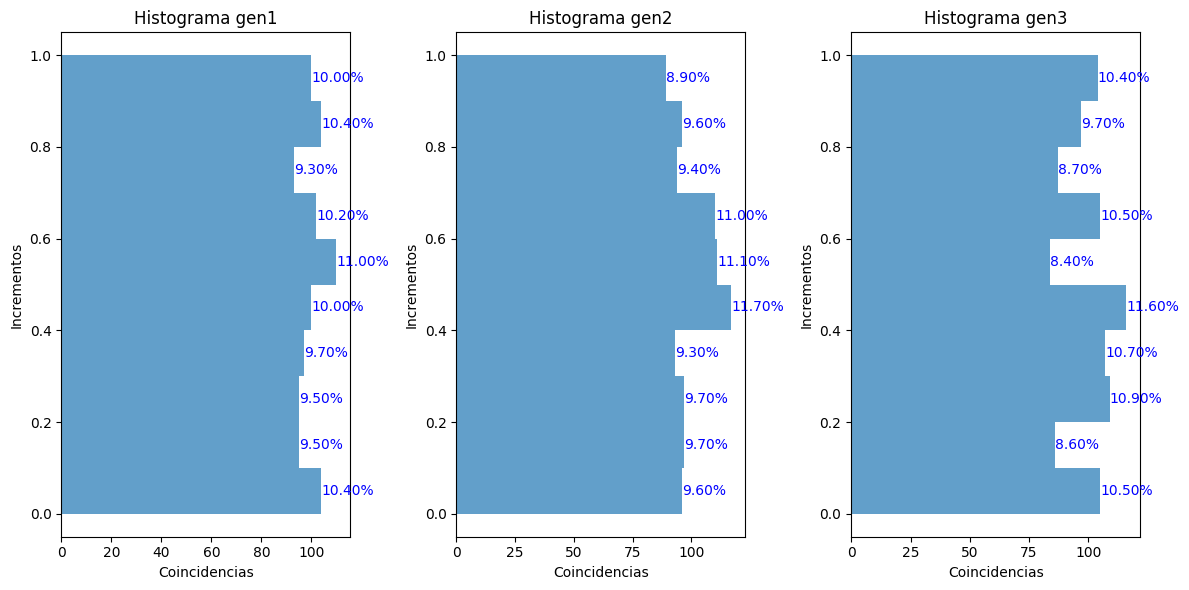

In [54]:
def graficar_results(a, b, c):
    bin_width = 0.1  # Aumenta el ancho de las barras a 0.2
    bins = [bin_width * i for i in range(11)]  # en incrementos de 0.2

    plt.figure(figsize=(12, 6))  # Tamaño de la figura para mostrar los 3 diagramas

    for i, generation in enumerate([a, b, c], start=1):
        plt.subplot(1, 3, i)
        n, _, _ = plt.hist(generation, bins=bins, alpha=0.7, orientation='horizontal', height=bin_width)  # Cambia a orientación horizontal
        porcentajeGen = [count / len(generation) * 100 for count in n]
        for j in range(len(bins) - 1):
            plt.annotate(f"{porcentajeGen[j]:.2f}%", xy=(n[j], bins[j] + bin_width / 2), ha='left', va='center', color='blue')  # Ajusta las coordenadas para la etiqueta
        plt.xlabel('Coincidencias')
        plt.ylabel('Incrementos')
        plt.title(f'Histograma gen{i}')

    plt.tight_layout()  # Ajuste automático de los subplots para evitar superposiciones
    plt.show()


evaluar_pseudo_randoms(1000)

tiene que dar numeros entre 0 y 1

### Task 3

In [ ]:
print(gen1(100))
print(gen2(100))
print(gen3(100))


0.6901012230574299
0.4153946155753893
0.4181835349695542
